## Introduction to Data Science
## Computer Assignment 2
### Professors: Bahrak and Yaghoob Zade
### Mohamad Mahdi Samadi
### Kasra Ghorbani

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

show_plots = True

### Reading data

In [147]:
df = pd.read_csv("task1.csv")

## Q1.
In this part we examine general structure of the data using pandas methods.

1. Head: shows n first rows of dataframe. for each column, there are enough examples to understand the general structure and values in it.

In [148]:
df.head(n=7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


2. Tail: It's the same as the Head method but for n last rows.

In [149]:
df.tail(n=7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
884,0,3,male,25.0,0,0,7.050,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


3. Info: calling it on the dataframe gives information like name, type and number of missing values for each column. it could also be called on a specifiec column and see the information of only that one.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


4. Describe: shows summary of each column separately. it's often used to analyse numerical data and doesn't give useful information for columns with data types. 

In [151]:
df.describe(include=["int", "float"]) 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Q2.
This part is about replacing categorical values with numbers. labeling them makes it easier to work with them. sometimes we need the actual value of those numbers to know what they mean, that's why itos (int to string) is created. I also made a copy of df before changing it.

In [152]:
def create_hash_dicts(df, categorical_columns):
    itos, stoi = dict(), dict()
    for col in categorical_columns:
        itos[col] = dict()
        stoi[col] = dict()
        unique_values = list(df[col].unique())
        for i in range(len(unique_values)):
            stoi[col][unique_values[i]] = i 
            itos[col][i] = unique_values[i]
    return itos, stoi
non_numeric_cols = df.select_dtypes(include=["object", "bool"]).columns
itos, stoi = create_hash_dicts(df=df, categorical_columns=non_numeric_cols)

def find_actual_value(df, col, i): 
    if col in non_numeric_cols:
        return itos[col][df[col][i]]
    return df[col][i]

def label_cat_with_num(df, col, stoi):    
    for i in range(len(df[col])):
        df[col][i] = stoi[col][df[col][i]]

def change_categorcal_columns_to_numerical(df, non_numeric_cols, stoi):
    for col in non_numeric_cols:
        label_cat_with_num(df=df, col=col, stoi=stoi)

df_cat = df.copy()

# there are a lot of wanrnings while changing values of dataframe.
# to observe outputs clearly we can ignore the warnings. 
import warnings
warnings.filterwarnings('ignore')
change_categorcal_columns_to_numerical(df=df, stoi=stoi, non_numeric_cols=non_numeric_cols)

## Q3.

Correlation coefficient measures the linear relationship between two variables. It has a value between -1 (perfect negative correlation) and 1 (perfect positive correlation), with 0 showing that there is no correlation. So the closer the absolute value of it gets to one, the stronger connection there is between variables.

for a large number of variables, heatmap helps to realize the potential relationships faster by just looking at the colors. annot argument indicates wether annotating the cells of map or not.  


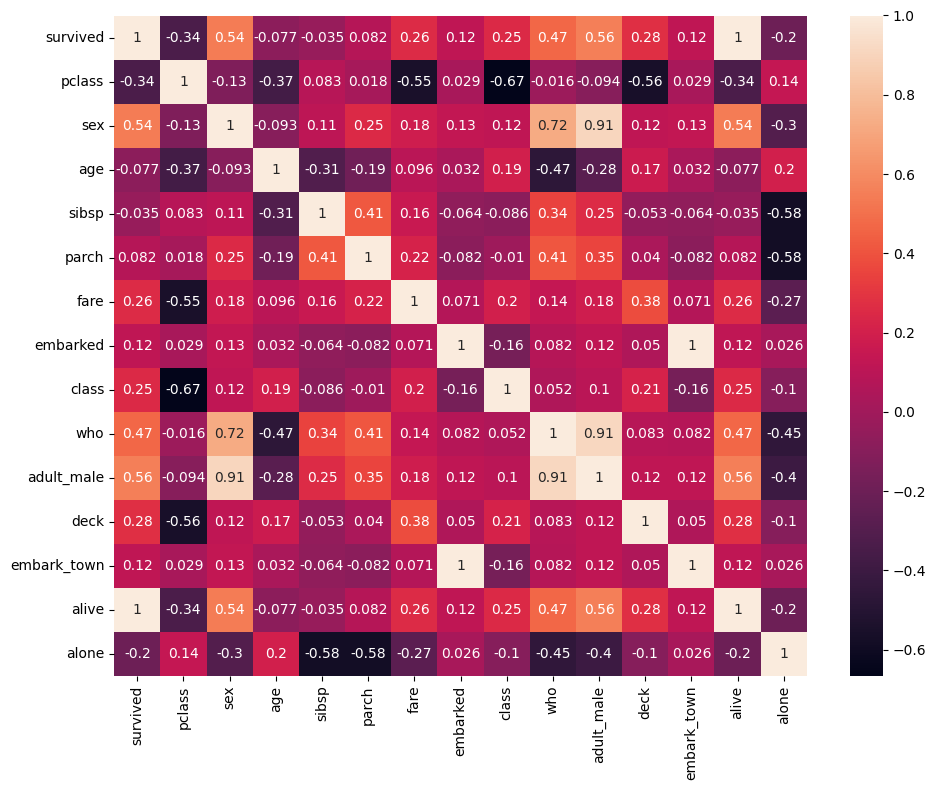

In [153]:
def generate_heatmap(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True)
    plt.tight_layout()
    plt.show()

if show_plots:
    generate_heatmap(df=df)

## Q4
As you can see there are some cells not on the main diagonal with value of one. it means that the two columns of that cell gives us the same information so one of them is extra and can be removed. before droping a column, we have to make sure that correlation value isn't high by coincidence. for example correlation between adult_male and sex is 0.91 which is high but it's obvious they're not related (small number of childern caused this illusion of correlation)

In [154]:
def delete_unnecessary_columns(df, unnecessary_columns):
    for unnecessary_column in unnecessary_columns:
        del df[unnecessary_column]
        
unnecessary_columns = ["alive", "embark_town"]
delete_unnecessary_columns(df=df, unnecessary_columns=unnecessary_columns)

## Q5, Q6 and Q7

syntax of separating a specifiec part of dataframe is as follows:

$ df [ df [col] == value ] $

In [155]:
survived_passengers = df[df['survived'] == 1]
survived_cnt = len(survived_passengers)

female_passengers_over_30 = df[(df["sex"] == stoi["sex"]["female"]) & (df["age"] > 30)]
female_over_30_cnt = len(female_passengers_over_30)

embarked_in_C_fare_higher_than_100 = df[(df['embarked'] == stoi["embarked"]["C"]) & (df["fare"] > 100)]
C_100_cnt = len(embarked_in_C_fare_higher_than_100)

## Q8
We have to find a suitable approach to fill missing values for each one. I searched about it and there was a lot of methods. but these two seemed more reliable for our dataser:

1. Mean/Median Imputation:
- Replace missing values with the mean or median of the non-missing values.

2. Predictive Imputation:
- use other features in the dataset to predict missing values.

In [156]:
def find_null_values(df):
    null_indexes = dict()
    for col in df.columns:
        indexes = []
        for i in range(len(df[col])):
            actual_value = find_actual_value(df, col, i)
            if pd.isnull(actual_value):
                indexes.append(i)
        if len(indexes):
            null_indexes[col] = indexes
    return null_indexes

null_indexes = find_null_values(df=df)

pd.DataFrame([len(null_indexes[k]) for k in null_indexes.keys()],
            columns=["missing count"], index=list(null_indexes.keys()))


,missing count
age,177
embarked,2
deck,688


There are three columns containing missing values.
1. **Age**: there are  about 180 missing values. It's a lot so we have to be careful with changing them because of their great influence on the data. We'll use the second approach. The sex column seems related to age. What we do is for each passenger with missing age we'll see the sex of passenger and gather age of all the passengers with that sex. Now using fitness proportionate method we select an age for the passenger.


2. **Deck**: there are about seven hundred null values. meaning that 77% of the data is missing and we can't fill them using the existing deck values. The relationship between deck town and embark town is strong and convincing enough to apply the predictive imputation method. But there might be a problem. some of embarked towns are also missing. it's unlikely but there might be a passenger with no data on both embarked and deck town. so we'll check existance of such passenger

3. **Embarked**: there are only two missing values. so we'll simply fill them with most frequented value.

In [157]:
def is_passenger_with_two_missing_values(df, col1, col2):
    for i in range(len(df)):
        if pd.isnull(df[col1][i]) and pd.isnull(df[col2][i]):
            return True
    return False
if (is_passenger_with_two_missing_values(df=df_cat, col1="embarked", col2="deck")):
    print("fix missing embarked towns first.")
else:
    print("no need to prioritize them.")

no need to prioritize them.


### Predicting missing values based on related data

In [158]:
def count_values(df, col, size_needed=False):
    n = len(df[col])
    d = dict()
    for i in range(len(df[col])):
        v = df[col][i]
        if pd.isnull(find_actual_value(df, col, i)):
            n -= 1
        else:
            if v not in d:
                d[v] = 0
            d[v] += 1
    if size_needed:
        return d, n
    else:
        return d

def calc_alternative_values_probability(df, null_col, related_col, unique_values):
    probs = dict()
    for u in unique_values:
        filtered_df = df[df[related_col] == u]
        # after filtering df we have to reset indexes to be continuous again
        filtered_df = filtered_df.reset_index(drop=True)
        value_counts, n = count_values(df=filtered_df, col=null_col, size_needed=True)
        prob = dict()
        for v in value_counts:
            prob[v] = value_counts[v] / n
        probs[u] = [prob, list(value_counts.keys())]
    return probs
    
def fill_missings(df, df_cat, null_col, null_ind, related_col):
    relative_col_unique_values = list(count_values(df=df, col=related_col, size_needed=False).keys())
    probs = calc_alternative_values_probability(df=df, null_col=null_col,
        related_col=related_col, unique_values=relative_col_unique_values)
    for i in null_ind:
        weights, population = probs[df[related_col][i]]
        alternative_value = random.choices(population=population, weights=weights, k=1)[0]
        df[null_col][i] = alternative_value
        df_cat[null_col][i] = alternative_value

In [159]:
def handle_missing_values(df, df_cat):
    fill_missings(df=df, df_cat=df_cat, null_ind=null_indexes["age"],
                  null_col="age", related_col="sex")

    value_count = count_values(df=df, col="embarked")
    alternative_value = max(value_count)
    for i in null_indexes["embarked"]:
        df["embarked"][i] = alternative_value
        df_cat["embarked"][i] = itos["embarked"][alternative_value]

    fill_missings(df=df, df_cat=df_cat, null_ind=null_indexes["deck"],
                  null_col="deck", related_col="embarked")


handle_missing_values(df=df, df_cat=df_cat)

## Q9

In [160]:
avg_ages = []
avg_ages.append( df["age"].mean().round(2) )
avg_ages.append(df[df["sex"] == stoi["sex"]["male"]]["age"].mean().round(2) )
avg_ages.append(df[df["sex"] == stoi["sex"]["female"]]["age"].mean().round(2) )

pd.DataFrame(avg_ages, columns=["avg age"], index=["all", "male", "female"])

,avg age
all,32.58
male,33.75
female,30.43


## Q10
To find out if there is a relationship between fare and survived columns, we can use the calculated correlation coefficient (0.26). In this case, There is a small connection between how much a passenger paid for their ticket and if they survived. But this connection is not very strong, so there are probably other factors affecting passengers survival. Like age, sex, class or even alone which will be analyzed in the next part.

### Handle outliers
outliers sometimes can change the appearance of plots and make them difficult to see the patterns. To identify and remove outliers , here we use the IQR method.

In [161]:
def remove_outliers(df):
    df_no_outliers = dict()
    for col in df.columns:
        first_quantile, third_quantile = df[col].quantile(0.25), df[col].quantile(0.75)
        interquartile_range = third_quantile - first_quantile
        lower_bound = first_quantile - 1.5*interquartile_range
        upper_bound = third_quantile + 1.5*interquartile_range
        df_no_outliers[col] = df[df[col].between(lower_bound, upper_bound)]
    return df_no_outliers

df_no_outliers = remove_outliers(df=df)

## Q11 and Q12
In these two part we analyze four factors and their influence on survival status of passengers. Fare, Alone, Class, Age. First using bar plots and then violin plots.

bar graph is a data visualization tool that uses rectangular bars to represent and compare categorical data or discrete values. Each bar represents a category, and its height is related to its value.

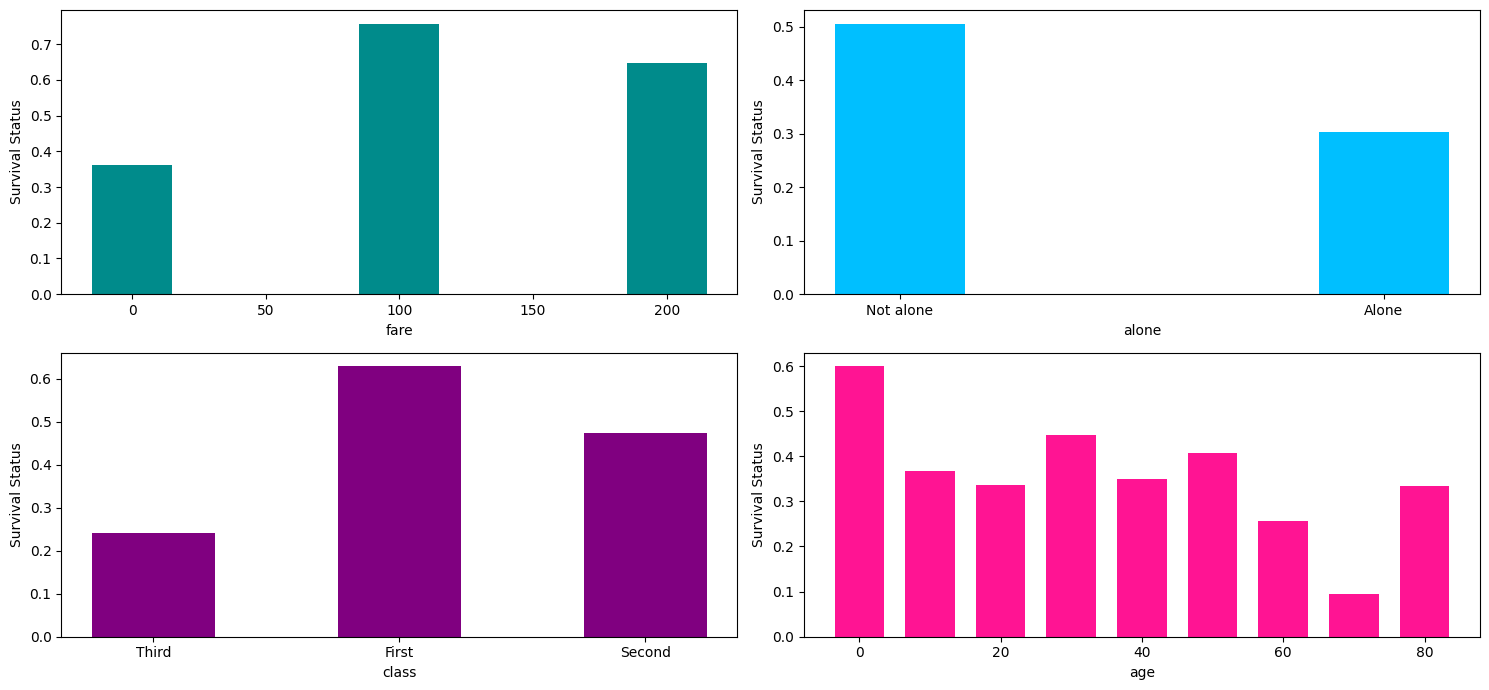

In [162]:
factors = [["fare", "alone"], ["class", "age"]]
def groupby(df, factor, col, step_len, step_num):
    count = [0] * step_num
    n = [0] * step_num
    for i in range(len(df)):
        ind = int ( df[factor][i] // step_len )
        if ind <= step_num:    
            if df[col][i]:
                count[ind] += 1
            n[ind] += 1
    return [count[i] / n[i] for i in range(len(n)) if n[i]]

def draw_bar_plot(df, factors):
    fig, ax = plt.subplots(2, 2, figsize=(15, 7))
    step = {"alone":1, "class":1, "fare":100, "age":10}
    numof_step = {"alone":2, "class":3, "fare":3, "age":9}
    width = {"alone":0.27, "class":0.5, "fare":30, "age":7}
    color = {"alone":"deepskyblue", "class":"purple", "fare":"darkcyan", "age":"deeppink"}
    bins = {"class":list(stoi["class"].keys()), "alone": ["Not alone", "Alone"],
            "fare":[x for x in range(0, step["fare"]*numof_step["fare"], step["fare"])],
            "age":[x for x in range(0, step["age"]*numof_step["age"], step["age"])]}
    for i in range(len(factors)):
        for j in range(len(factors[i])):
            f = factors[i][j]
            height = groupby(df=df, factor=f, col="survived", step_len=step[f], step_num=numof_step[f])
            ax[i, j].bar(x=bins[f], height=height, width=width[f], color=color[f], alpha=1)        
            ax[i, j].set(xlabel=f, ylabel="Survival Status")
    fig.tight_layout()
    plt.show()

if show_plots:
    draw_bar_plot(df=df, factors=factors)

A violin graph, is also a data visualization tool that combines the features of box plots and density plots. Like box plots, violin plots shows the three quantiles, interquartile range (IQR), and outliers. they also show probability density function (pmf). The width of the violin around each range is related to teh frequency or sample size within it.

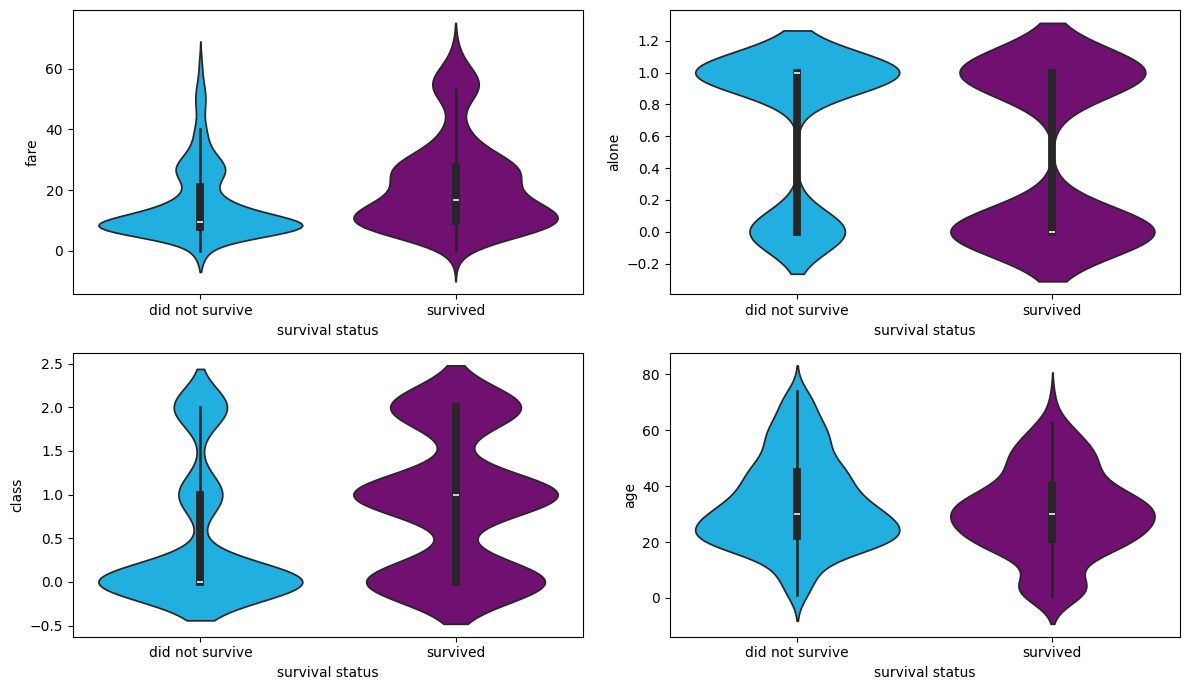

In [163]:
def draw_violin_plot(df, factors):
    fig, ax = plt.subplots(2, 2, figsize=(12, 7))
    for i in range(len(factors)):
        for j in range(len(factors[i])):
            f = factors[i][j]
            color_map = {"0": "deepskyblue", "1": "purple"}
            sns.violinplot(data=df[f] , x="survived", y=f, palette=color_map, ax=ax[i, j])
            ax[i, j].set_xticklabels(["did not survive", "survived"])
            ax[i, j].set(xlabel="survival status", ylabel=f)
    fig.tight_layout()
    plt.show()

if show_plots:
    draw_violin_plot(df=df_no_outliers, factors=factors)

Let's describe graphs a little bit.
1. **Fare**: The unexpected result is probably because of the effect of another factor on both fare and survival. A variable that affects both the factors and make it seem like there is a relationship between the two are called confounder. Here age is confounder variable. The older people have more money and also die faster. but middle age people are more strong and also have enough money.

2. **Alone**: alone people are more likely to die because they have no help. So sad!

3. **Class**: Obvious correlation between the class and survival rate. people with a better seat on the ship are more likely to survive.

4. **Age**: Shows that the younger people survived more. Which is logical because of their better physical status.

## Q13

Scatter plot is another data visualization tool that shows the relationship between two numerical variables, plotting each data point as a dot on a two-dimensional plane. The position of a dot represents the values of the two variables for an individual data point. Scatter plots can help identify patterns, trends, or correlations between the variables.

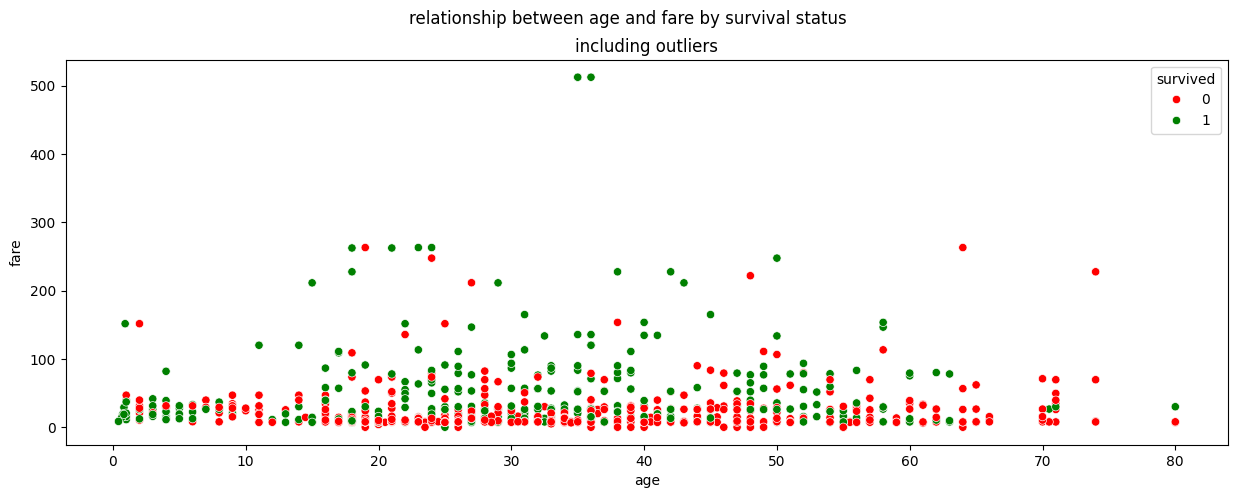

In [164]:
def draw_scatter_plot(df):
    color_map = {0: 'red', 1: 'green'}
    plt.figure(figsize=(15, 5))
    sns.scatterplot(data=df, x="age", y="fare", hue="survived", palette=color_map)
    plt.xlabel("age"); plt.ylabel("fare"); plt.title("including outliers")
    plt.suptitle("relationship between age and fare by survival status")
    plt.show()

if show_plots:
    draw_scatter_plot(df=df)

Two outliers up there made other values seem very dense so we wouldn't be able to find much about them. By looking at these plots we can find out some facts. besides the correlation between survival status with fare paid or age which we already knew about, A large number of people paid about 10$. As you know most of the ship passengers stay on deck and don't pay much. So all these red dots in the down of plot are the people on deck of the ship.

## Q14

In [165]:
def create_pivot_table(df, index):
    pivot_df = pd.pivot_table(data=df, index=index, values=["fare", "survived"],
        aggfunc={"fare": "mean", "survived": lambda x: x.mean()})
    pivot_df = pivot_df.rename(columns={"fare": "avg fare", "survived": "survival percentage"})
    pivot_df["avg fare"] = pivot_df["avg fare"].round(2)
    pivot_df["survival percentage"] = (pivot_df["survival percentage"] * 100).round(2)
    return pivot_df

In [166]:
create_pivot_table(df=df_cat, index=["sex", "class"])

avg fare  survival percentage
sex    class                                
female First     106.13                96.81
       Second     21.97                92.11
       Third      16.12                50.00
male   First      67.23                36.89
       Second     19.74                15.74
       Third      12.66                13.54

In [167]:
create_pivot_table(df=df_cat, index=["who"])

,avg fare,survival percentage
who,,
child,32.79,59.04
man,24.86,16.39
woman,46.57,75.65


We can see that survival percentage is a lot more for women and children than men. Remindes us of the Titanic movie.

## Q15
grouped/clustered bar plots are data visualization tools used to compare values across different categories or groups. These plots display bars representing the values of a variable, grouped by another categorical variable. The bars are positioned side by side and have a common scale and it makes them easier to compare. Each bar shows a unique category or group, and its height is the measured value. The grouped bar plot helps find the differences between categories and identify patterns within the data. Here we draw two types of grouped bars. First type places the rectangles side by side and the second one is like stack.

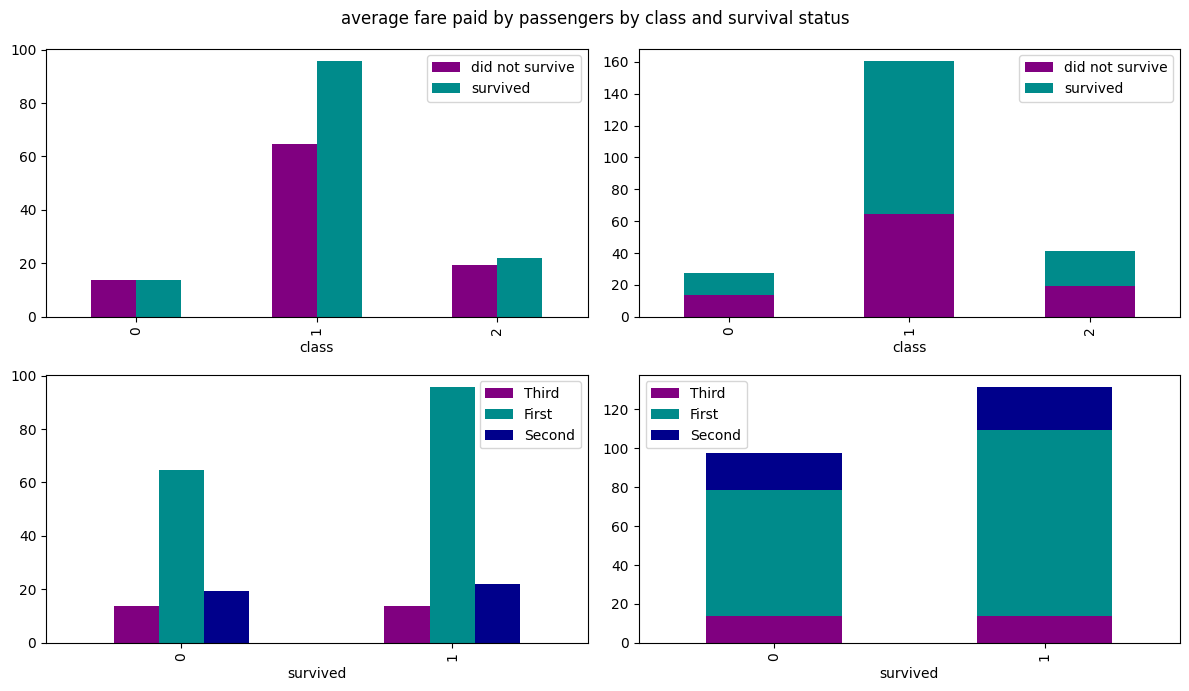

In [168]:
def draw_grouped_bar(df):
    fig, ax = plt.subplots(2, 2, figsize=(12, 7))
    grouped_df = [df.groupby(["class", "survived"]).mean()["fare"], df.groupby(["survived", "class"]).mean()["fare"]]
    colors = [["purple", "darkcyan"], ["purple", "darkcyan", "darkblue"]]
    labels = [["did not survive", "survived"], list(stoi["class"].keys())]
    for i in range(len(grouped_df)):
        for j in range(2):
            grouped_df[i].unstack().plot(kind='bar', stacked=bool(j), ax=ax[i, j], color=colors[i])
            ax[i, j].legend(labels=labels[i])
            
    fig.suptitle("average fare paid by passengers by class and survival status")
    plt.tight_layout()
    plt.show()
    
if show_plots:
    draw_grouped_bar(df=df)